# Bellman Ford
 - **O( V^2 + E )**
 - **finds lowest-cost / shortest-path from A to B**

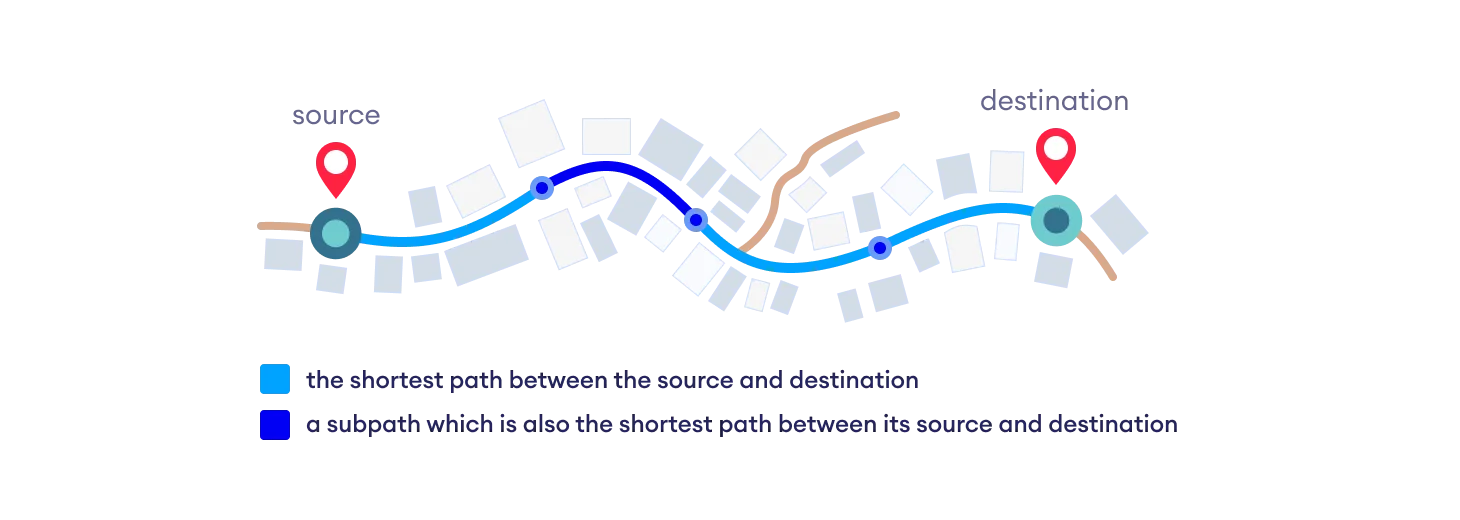

In [1]:
def bellman_ford(graph, source):
    # Step 1: Prepare the distance and predecessor for each node
    distance, predecessor = dict(), dict()
    for node in graph:
        distance[node], predecessor[node] = float('inf'), None
    distance[source] = 0

    # Step 2: Relax the edges
    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbour in graph[node]:
                # If the distance between the node and the neighbour is lower than the current, store it
                if distance[neighbour] > distance[node] + graph[node][neighbour]:
                    distance[neighbour], predecessor[neighbour] = distance[node] + graph[node][neighbour], node

    # Step 3: Check for negative weight cycles
    for node in graph:
        for neighbour in graph[node]:
            assert distance[neighbour] <= distance[node] + graph[node][neighbour], "Negative weight cycle."
            
   # Step 4: Making a df
    import numpy  as np
    import pandas as pd
    
    PATH, DIST, NODEs = [], [], graph.keys()
    for node in NODEs:
        stop = node
        path = [stop]
        dist = distance[node]
        while (stop != source) and predecessor[stop] in NODEs:
            stop = predecessor[stop]
            path.append(stop)
        path.reverse() 
        if path[0] == source: 
            PATH.append( path )
            DIST.append( dist )
        else: 
            PATH.append( np.nan )
            DIST.append( np.inf )
    
    df = pd.DataFrame()
    df['from'] = [source]*len(NODEs)
    df[ 'to' ] = NODEs
    df['path'] = PATH
    df['dist'] = DIST
    df.sort_values(['dist','to'],inplace=True)

    return df, distance, predecessor

#   
##   Example

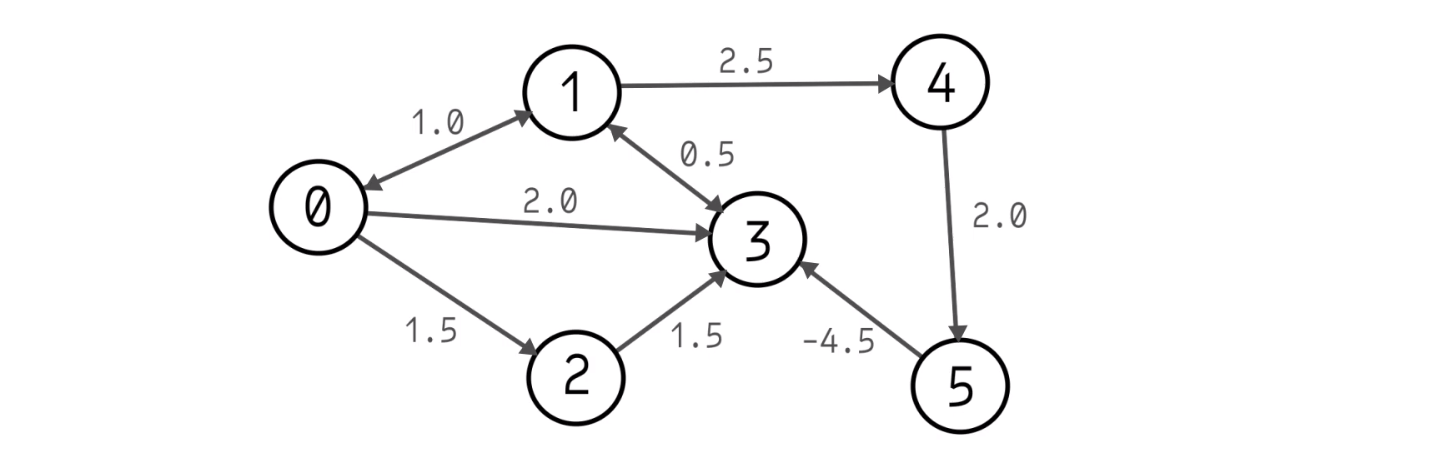

In [2]:
graph = {
    '0': { '1':+1, '2':+1.5, '3':+2   },
    '1': { '0':+1, '3':+.5,  '4':+2.5 },
    '2': { '3':+1.5 },
    '3': {  },
    '4': { '5':+2   },
    '5': { '3':-4.5 }
        }

df, distance, predecessor = bellman_ford( graph, source='4')
df

,from,to,path,dist
3,4,3,"[4, 5, 3]",-2.5
4,4,4,[4],0.0
5,4,5,"[4, 5]",2.0
0,4,0,NaN,inf
1,4,1,NaN,inf
2,4,2,NaN,inf


#   
##   Example

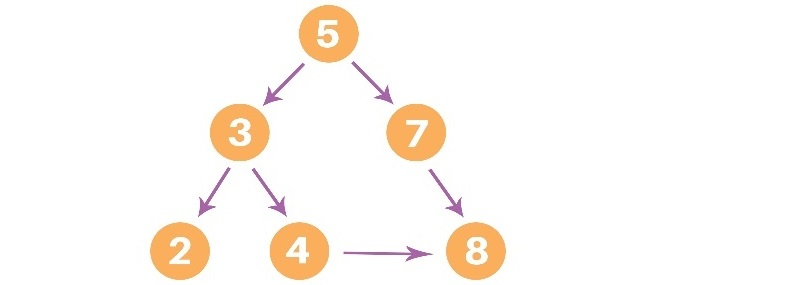

In [3]:
graph = {
    '2': { },
    '3': { '2':+1, '4':+1 },
    '4': { '8':+1 },
    '5': { '3':+1, '7':+1 },
    '7': { '8':+1   },
    '8': { }
        }

df, distance, predecessor = bellman_ford( graph, source='5')
df

,from,to,path,dist
3,5,5,[5],0
1,5,3,"[5, 3]",1
4,5,7,"[5, 7]",1
0,5,2,"[5, 3, 2]",2
2,5,4,"[5, 3, 4]",2
5,5,8,"[5, 7, 8]",2


#####   

#####   